### DBSCAN 

- stands for “density based spatial clustering of applications with noise”

- **DBSCAN is a density based algorithm**

- **Density means no. of points with in a specified radius r(eps)**

- A point is a **core point** if it has atleast specified no. of points with in radius eps

- A point which has fewer than specified points with in radius eps is called **border point**
 but it is the neighborhood of a core point

- A point which is not a core point or border point is called **noise point**

- does not require the user to set the number of clusters a priori

- can identify points that are not part of any cluster (very useful as outliers detector)

- There are two parameters in DBSCAN: **min_samples and eps**

<img src='images/db1.PNG' width='80%' height='80%'/>

<img src='images/dbscan.png' width='50%' height='50%' />

A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). 

### Lets take an example

In [3]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

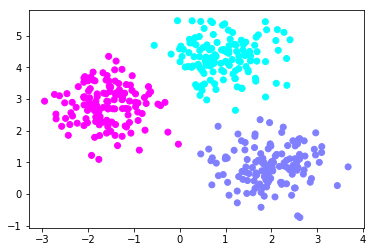

In [9]:
X, y = make_blobs(n_samples=400,cluster_std=0.6,random_state=0)

plt.scatter(X[:,0],X[:,1],c=y,cmap='cool')

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
dbscan = DBSCAN(eps = 0.3,metric="euclidean",min_samples = 10)
clusters = dbscan.fit_predict(X_scaled)

In [17]:
#clusters

Text(0.5,1,'eps=0.3,min samples=10')

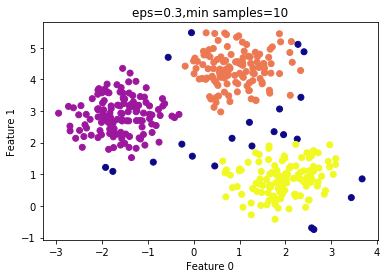

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title('eps={},min samples={}'.format(dbscan.eps,dbscan.min_samples))

In [23]:
print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(y, dbscan.labels_))

Adjusted Rand Index: 0.916


### The parameter eps

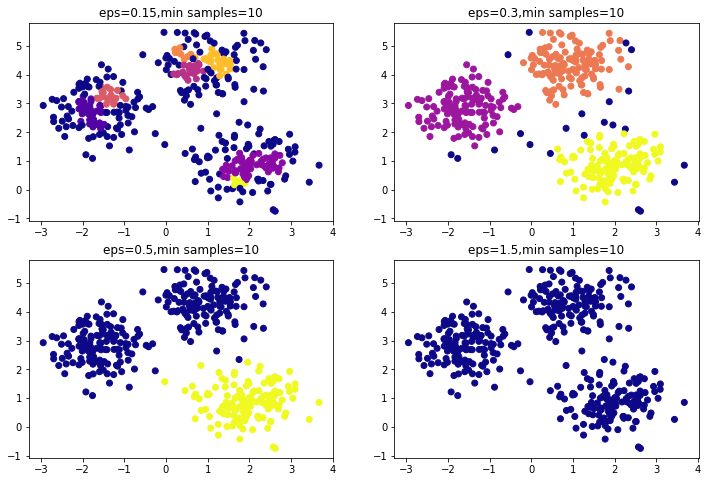

In [31]:
plt.figure(figsize=(12,8))
for i,k in enumerate([.15,.3,.5,1.5],start=1):
    plt.subplot(2,2,i)
    db = DBSCAN(eps = k,metric="euclidean",min_samples = 10)
    db.fit(X_scaled)
    
    plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap="plasma")
   # plt.xlabel("Feature 0")
   # plt.ylabel("Feature 1")
    plt.title('eps={},min samples={}'.format(db.eps,dbscan.min_samples))

**The parameter eps** controls the local neighborhood of the points. 

**When chosen too small**, most data will not be clustered at all (and labeled as -1 for “noise”).

**When chosen too large**, it causes close clusters to be merged into one cluster, and eventually the entire data set to be returned as a single cluster. 

### The parameter min_samples

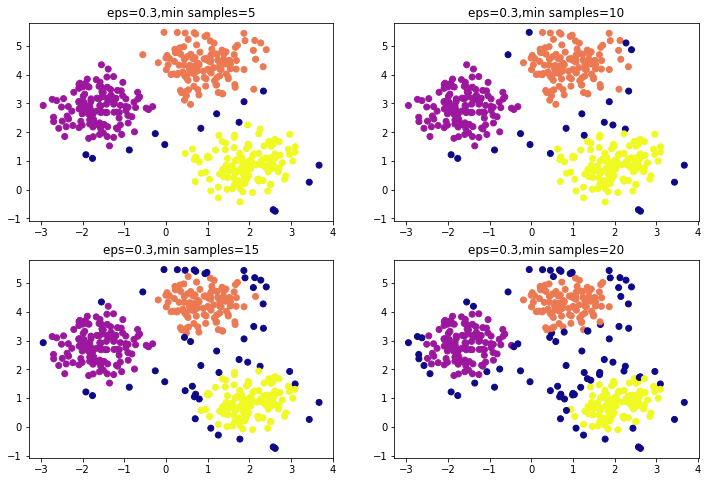

In [34]:
plt.figure(figsize=(12,8))
for i,k in enumerate([5,10,15,20],start=1):
    plt.subplot(2,2,i)
    db = DBSCAN(eps = .3,metric="euclidean",min_samples = k)
    db.fit(X_scaled)
    
    plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap="plasma")
   # plt.xlabel("Feature 0")
   # plt.ylabel("Feature 1")
    plt.title('eps={},min samples={}'.format(db.eps,db.min_samples))